In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [71]:
train_data = pd.read_csv('/content/Wimbledon_featured_matches.csv')

In [72]:
"""
train_data['elapsed_time_td'] = pd.to_timedelta(train_data['elapsed_time'])
base_time = train_data['elapsed_time_td'].iloc[0]
train_data['time_diff_seconds'] = (train_data['elapsed_time_td'] - base_time).dt.total_seconds().astype(int)
train_data['time_diff_seconds'].astype(int)
"""

"\ntrain_data['elapsed_time_td'] = pd.to_timedelta(train_data['elapsed_time'])\nbase_time = train_data['elapsed_time_td'].iloc[0]\ntrain_data['time_diff_seconds'] = (train_data['elapsed_time_td'] - base_time).dt.total_seconds().astype(int)\ntrain_data['time_diff_seconds'].astype(int)\n"

In [73]:
train_data.head()

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:00,1,1,1,0,0,0,...,0,0,0,6.000,7.840,2,95.0,BC,NCTL,ND
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:38,1,1,2,0,0,0,...,0,0,0,5.253,7.094,1,118.0,B,CTL,ND
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:01,1,1,3,0,0,0,...,0,0,0,13.800,19.808,4,120.0,B,NCTL,D
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:31,1,1,4,0,0,0,...,0,0,0,51.108,75.631,13,130.0,BW,CTL,D
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:02:21,1,1,5,0,0,0,...,0,0,0,0.649,0.813,1,112.0,W,NCTL,NaN


In [74]:
train_data['speed_mph'] = train_data['speed_mph'].fillna(train_data['speed_mph'].interpolate())

train_data = pd.get_dummies(train_data, columns=['serve_width'], prefix='serve_width')
train_data = pd.get_dummies(train_data, columns=['serve_depth'], prefix='serve_depth')
train_data = pd.get_dummies(train_data, columns=['return_depth'], prefix='return_depth')

print(train_data.isnull().sum())

match_id              0
player1               0
player2               0
elapsed_time          0
set_no                0
game_no               0
point_no              0
p1_sets               0
p2_sets               0
p1_games              0
p2_games              0
p1_score              0
p2_score              0
server                0
serve_no              0
point_victor          0
p1_points_won         0
p2_points_won         0
game_victor           0
set_victor            0
p1_ace                0
p2_ace                0
p1_winner             0
p2_winner             0
winner_shot_type      0
p1_double_fault       0
p2_double_fault       0
p1_unf_err            0
p2_unf_err            0
p1_net_pt             0
p2_net_pt             0
p1_net_pt_won         0
p2_net_pt_won         0
p1_break_pt           0
p2_break_pt           0
p1_break_pt_won       0
p2_break_pt_won       0
p1_break_pt_missed    0
p2_break_pt_missed    0
p1_distance_run       0
p2_distance_run       0
rally_count     

In [75]:
replacement_dict = {'F': 1,'B': 2}  # Example replacement
train_data['winner_shot_type'].replace(replacement_dict, inplace=True)
train_data['winner_shot_type'] = pd.to_numeric(train_data['winner_shot_type'], errors='coerce')

In [76]:
replacement_dict = {'AD': 50}  # Example replacement
train_data['p1_score'].replace(replacement_dict, inplace=True)
train_data['p1_score'] = pd.to_numeric(train_data['p1_score'], errors='coerce')

replacement_dict = {'AD': 50}  # Example replacement
train_data['p2_score'].replace(replacement_dict, inplace=True)
train_data['p2_score'] = pd.to_numeric(train_data['p2_score'], errors='coerce')

In [77]:
cols_to_delete = ['elapsed_time','match_id','player1','player2','p1_break_pt','p2_break_pt','p1_break_pt_won','p2_break_pt_won','p1_break_pt_missed','p2_break_pt_missed','elapsed_time']
train_data_num = train_data.drop(columns = cols_to_delete)

In [78]:
train_data_num.head()

,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,p2_games,p1_score,p2_score,server,...,speed_mph,serve_width_B,serve_width_BC,serve_width_BW,serve_width_C,serve_width_W,serve_depth_CTL,serve_depth_NCTL,return_depth_D,return_depth_ND
0,1,1,1,0,0,0,0,0,0,1,...,95.0,0,1,0,0,0,0,1,0,1
1,1,1,2,0,0,0,0,0,15,1,...,118.0,1,0,0,0,0,1,0,0,1
2,1,1,3,0,0,0,0,15,15,1,...,120.0,1,0,0,0,0,0,1,1,0
3,1,1,4,0,0,0,0,15,30,1,...,130.0,0,0,1,0,0,1,0,1,0
4,1,1,5,0,0,0,0,30,30,1,...,112.0,0,0,0,0,1,0,1,0,0


In [79]:
def is_mixed_type(column):
    has_numeric = False
    has_non_numeric = False

    for value in column:
        try:
            # Attempt to convert to float
            float(value)
            has_numeric = True
        except ValueError:
            # If conversion fails, value is non-numeric
            has_non_numeric = True

        # If both types are found, no need to check further
        if has_numeric and has_non_numeric:
            return True

    return False

In [80]:
from sklearn import preprocessing

features_columns = [col for col in train_data_num.columns if col not in ['point_victor']]

min_max_scaler = preprocessing.MinMaxScaler()

min_max_scaler = min_max_scaler.fit(train_data_num[features_columns])

train_data_scaler = min_max_scaler.transform(train_data_num[features_columns])

train_data_scaler = pd.DataFrame(train_data_scaler)
train_data_scaler.columns = features_columns

train_data_scaler['point_victor'] = train_data['point_victor']

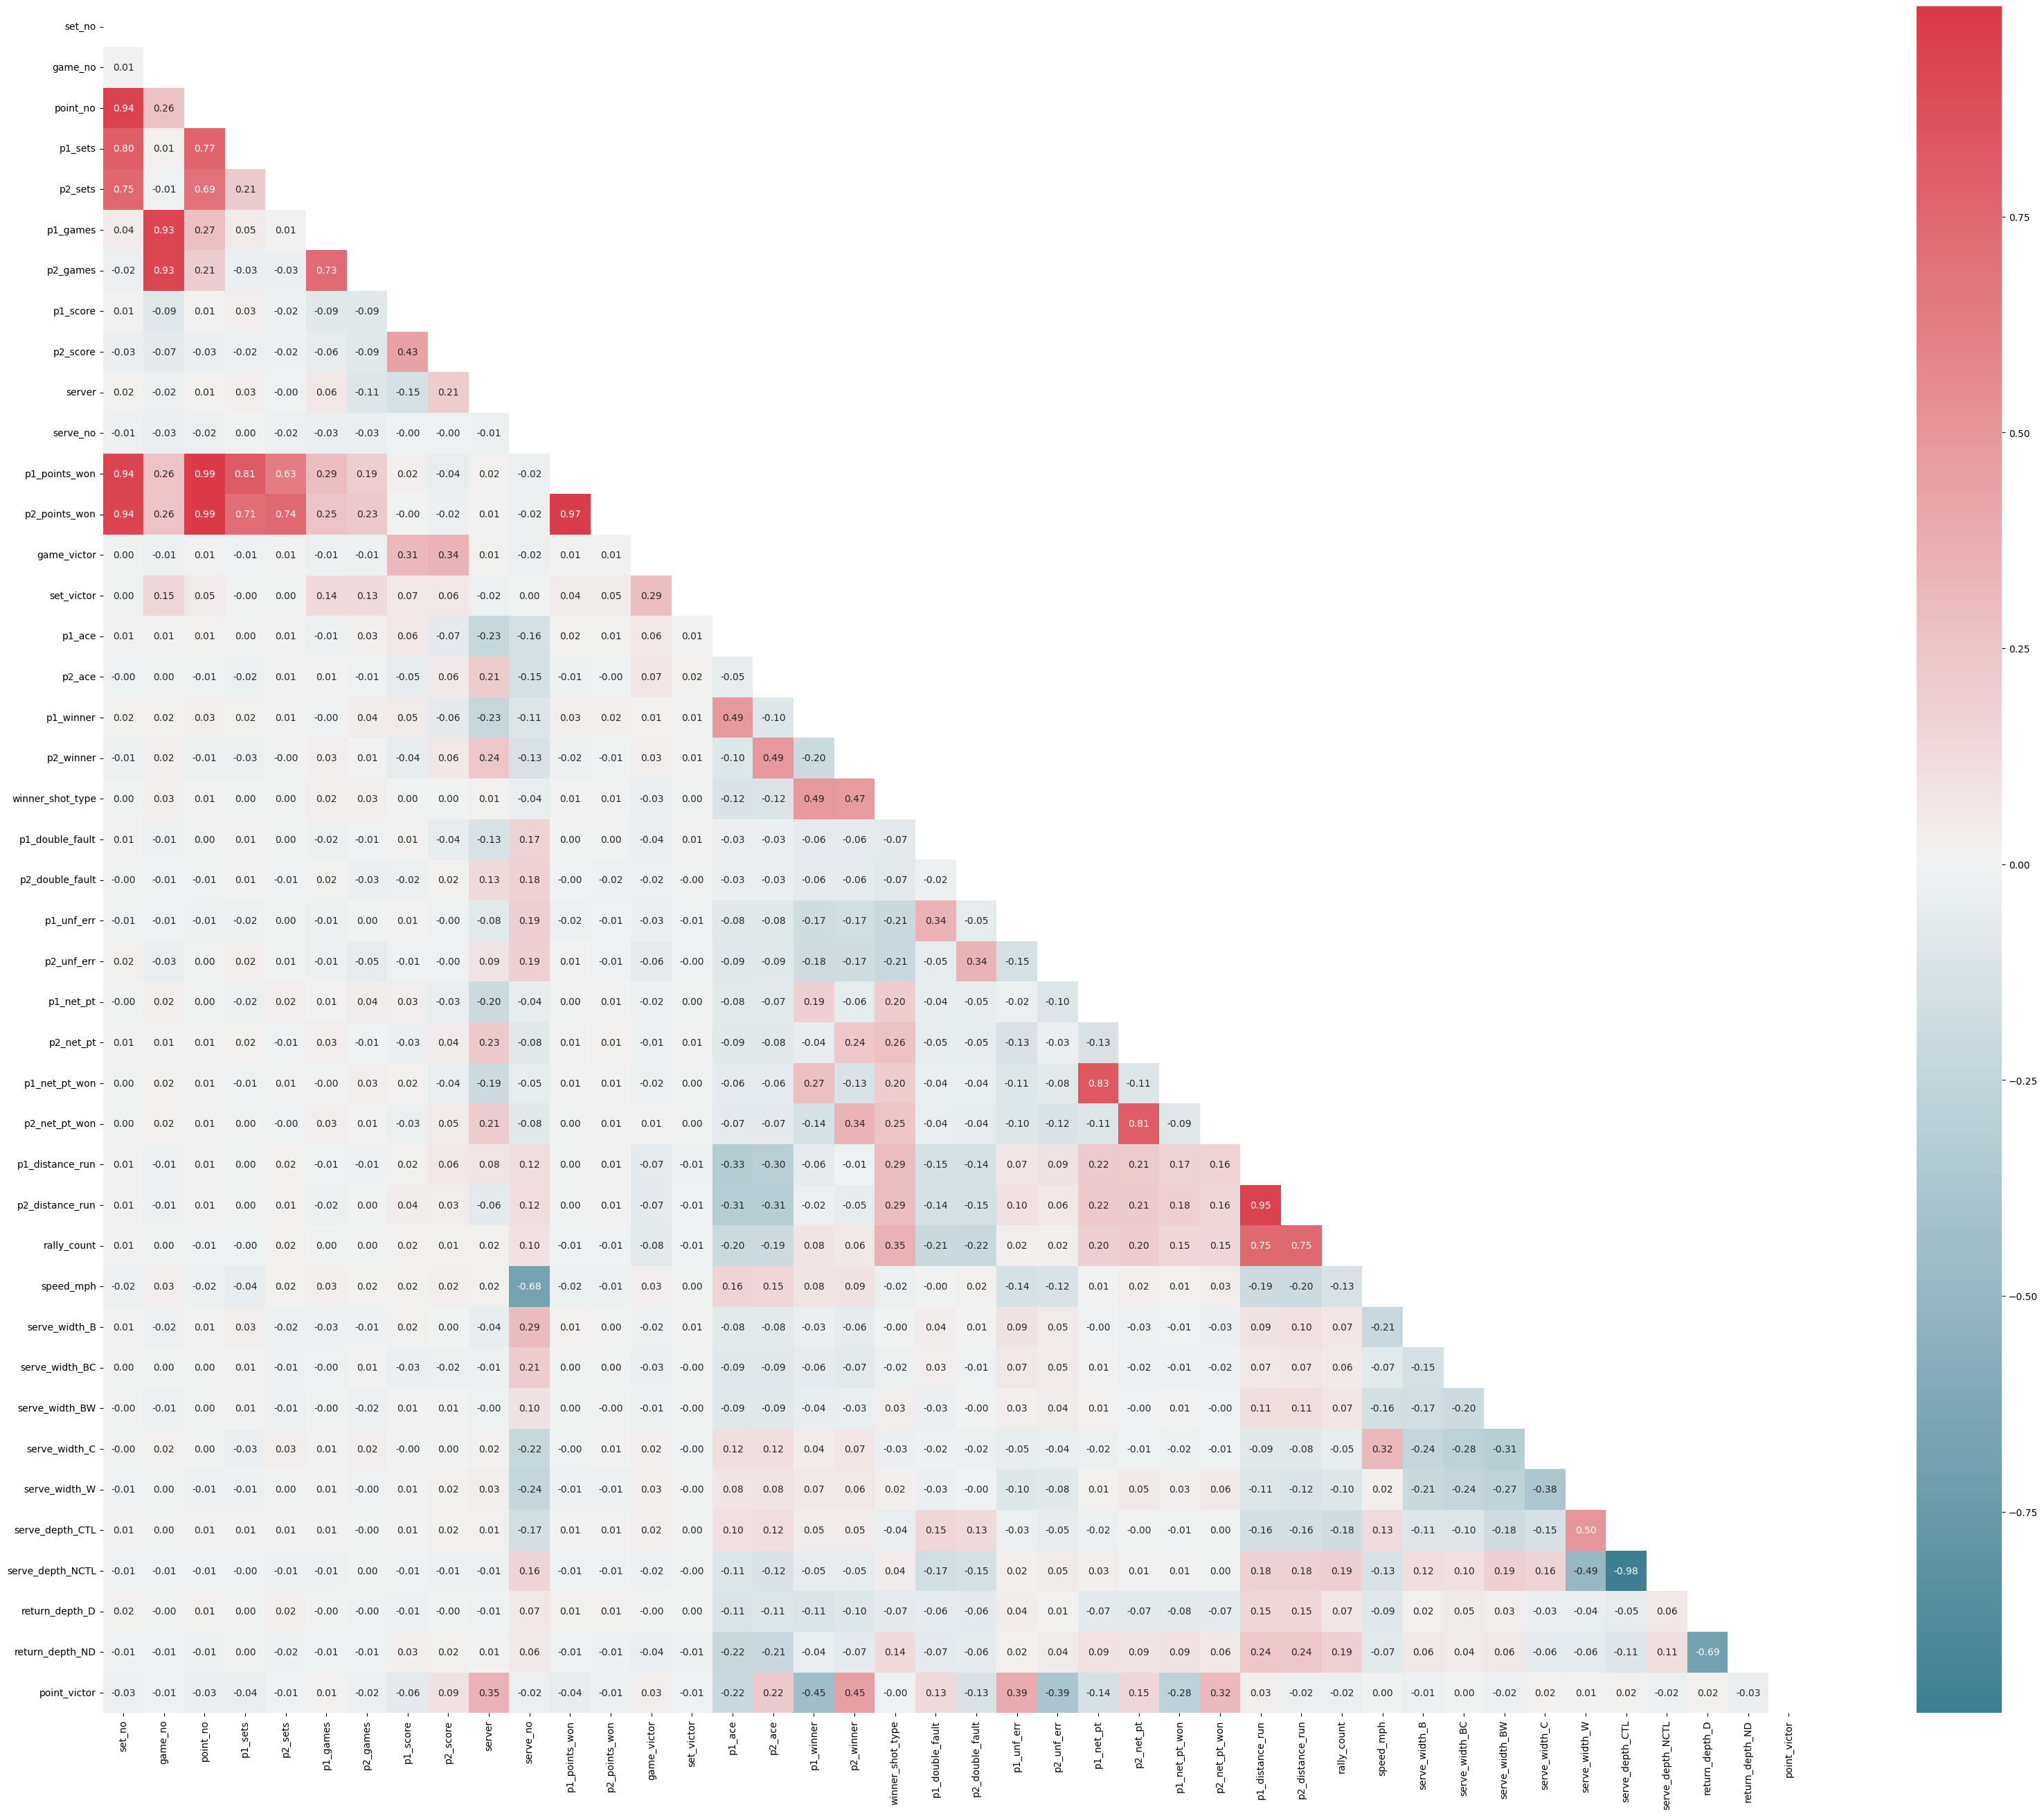

In [82]:
plt.figure(figsize=(40, 32))
column = train_data_scaler.columns.tolist()
mcorr = train_data_scaler[column].corr(method="spearman")
mask = np.zeros_like(mcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')
plt.show()

In [86]:
from sklearn.decomposition import PCA
#PCA方法降维
#保留16个主成分
pca = PCA(n_components=0.95)
new_train_pca_16 = pca.fit_transform(train_data_scaler.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41]])
new_train_pca_16 = pd.DataFrame(new_train_pca_16)

In [87]:
new_train_pca_16.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.805926,0.233008,-0.487567,-0.966929,-0.780849,0.045993,1.003296,-0.183335,0.171227,-0.807654,...,0.084677,0.390328,-0.345402,-0.077592,-0.099799,-0.257700,0.085788,-0.071113,0.274912,0.073458
1,0.575779,-0.646019,-0.669947,-0.929037,-0.217202,-0.392532,0.391372,0.172811,0.005031,-0.465767,...,-0.243896,-0.162260,0.076436,0.051367,0.372447,1.073195,-0.075081,0.401545,0.054882,0.293428
2,-0.403708,0.300651,0.777765,-1.071061,-0.077554,-0.162334,0.798710,-0.568968,-0.243681,-0.384801,...,-0.125438,-0.504592,-0.136242,0.333226,0.287233,0.807185,0.017493,-0.347444,0.328928,0.115433
3,0.707311,-0.684729,0.461670,-1.022297,0.163301,-0.475190,-0.553676,-0.824277,0.096303,-0.043398,...,-0.472688,0.607717,-0.400433,0.557583,-0.033430,0.366791,-0.234707,-0.023724,0.221773,0.349188
4,0.133972,-0.895515,0.008493,-0.979234,0.512344,-0.579155,-0.161222,-0.682610,-0.122908,-0.023477,...,-0.131943,-0.541755,-0.744803,-0.458855,-0.269465,-0.253113,0.503228,-0.251942,-0.173811,0.110986


In [92]:
from sklearn.linear_model import LinearRegression  #线性回归
from sklearn.neighbors import KNeighborsRegressor  #K近邻回归
from sklearn.tree import DecisionTreeRegressor     #决策树回归
from sklearn.ensemble import RandomForestRegressor #随机森林回归
from sklearn.svm import SVR  #支持向量回归
import lightgbm as lgb #lightGbm模型
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split # 切分数据
from sklearn.metrics import mean_squared_error #评价指标

In [94]:
train = new_train_pca_16[new_train_pca_16.columns]
target = train_data_scaler['point_victor']

# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

In [95]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.805926,0.233008,-0.487567,-0.966929,-0.780849,0.045993,1.003296,-0.183335,0.171227,-0.807654,...,0.084677,0.390328,-0.345402,-0.077592,-0.099799,-0.257700,0.085788,-0.071113,0.274912,0.073458
1,0.575779,-0.646019,-0.669947,-0.929037,-0.217202,-0.392532,0.391372,0.172811,0.005031,-0.465767,...,-0.243896,-0.162260,0.076436,0.051367,0.372447,1.073195,-0.075081,0.401545,0.054882,0.293428
2,-0.403708,0.300651,0.777765,-1.071061,-0.077554,-0.162334,0.798710,-0.568968,-0.243681,-0.384801,...,-0.125438,-0.504592,-0.136242,0.333226,0.287233,0.807185,0.017493,-0.347444,0.328928,0.115433
3,0.707311,-0.684729,0.461670,-1.022297,0.163301,-0.475190,-0.553676,-0.824277,0.096303,-0.043398,...,-0.472688,0.607717,-0.400433,0.557583,-0.033430,0.366791,-0.234707,-0.023724,0.221773,0.349188
4,0.133972,-0.895515,0.008493,-0.979234,0.512344,-0.579155,-0.161222,-0.682610,-0.122908,-0.023477,...,-0.131943,-0.541755,-0.744803,-0.458855,-0.269465,-0.253113,0.503228,-0.251942,-0.173811,0.110986


In [96]:
clf = LinearRegression()
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("LinearRegression:   ", score)

LinearRegression:    0.011653486275972666


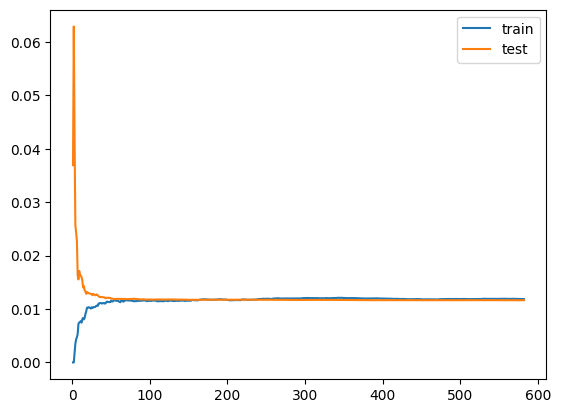

In [97]:
train_score = []
test_score = []

# 给予不同的数据量，查看模型的学习效果
for i in range(10, len(train_data)+1, 10):
    lin_reg = LinearRegression()
    lin_reg.fit(train_data[:i], train_target[:i])
    # LinearRegression().fit(X_train[:i], y_train[:i])

    # 查看模型的预测情况：两种，模型基于训练数据集预测的情况(可以理解为模型拟合训练数据集的情况)，模型基于测试数据集预测的情况
    # 此处使用 lin_reg.predict(X_train[:i])，为训练模型的全部数据集
    y_train_predict = lin_reg.predict(train_data[:i])
    train_score.append(mean_squared_error(train_target[:i], y_train_predict))

    y_test_predict = lin_reg.predict(test_data)
    test_score.append(mean_squared_error(test_target, y_test_predict))

# np.sqrt(train_score)：将列表 train_score 中的数开平方
plt.plot([i for i in range(1, len(train_score)+1)], train_score, label='train')
plt.plot([i for i in range(1, len(test_score)+1)], test_score, label='test')

# plt.legend()：显示图例（如图形的 label）；
plt.legend()
plt.show()

In [98]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    """绘制学习曲线：只需要传入算法(或实例对象)、X_train、X_test、y_train、y_test"""
    """当使用该函数时传入算法，该算法的变量要进行实例化，如：PolynomialRegression(degree=2)，变量 degree 要进行实例化"""
    train_score = []
    test_score = []
    for i in range(10, len(X_train)+1, 10):
        algo.fit(X_train[:i], y_train[:i])

        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))

        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))

    plt.plot([i for i in range(1, len(train_score)+1)],
            train_score, label="train")
    plt.plot([i for i in range(1, len(test_score)+1)],
            test_score, label="test")

    plt.legend()
    plt.show()

In [99]:
for i in range(3,20):
    clf = KNeighborsRegressor(n_neighbors=i) # 最近三个
    clf.fit(train_data, train_target)
    score = mean_squared_error(test_target, clf.predict(test_data))
    print("KNeighborsRegressor:   ", score)

KNeighborsRegressor:    0.010295126973232668
KNeighborsRegressor:    0.010552505147563486
KNeighborsRegressor:    0.011503088538091968
KNeighborsRegressor:    0.011915656219019294
KNeighborsRegressor:    0.012522236073564636
KNeighborsRegressor:    0.012718771448181194
KNeighborsRegressor:    0.013540422142572683
KNeighborsRegressor:    0.013514070006863416
KNeighborsRegressor:    0.014163598926811004
KNeighborsRegressor:    0.014441775337451383
KNeighborsRegressor:    0.01468527776536857
KNeighborsRegressor:    0.015053996890451444
KNeighborsRegressor:    0.015059864256844352
KNeighborsRegressor:    0.01501372683596431
KNeighborsRegressor:    0.015199264735568421
KNeighborsRegressor:    0.015304998432429228
KNeighborsRegressor:    0.01504628529384365


In [100]:
clf = DecisionTreeRegressor()
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("DecisionTreeRegressor:   ", score)

DecisionTreeRegressor:    0.004118050789293068


In [101]:
clf = RandomForestRegressor(n_estimators=200) # 200棵树模型
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("RandomForestRegressor:   ", score)

RandomForestRegressor:    0.003723146877144818


In [103]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    print(train_scores_mean)
    print(test_scores_mean)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [104]:
clf = LinearRegression()
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("LinearRegression:   ", score)

LinearRegression:    0.011653486275972666


[0.95405854 0.95275142 0.9526637  0.95263697 0.95256844]
[0.94995133 0.95148461 0.95174176 0.95181648 0.95187406]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

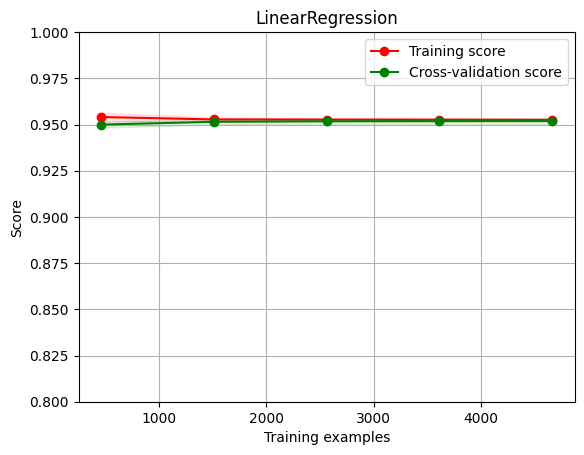

In [108]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
X = train_data.values
y = train_target.values

# 图一
title = r"LinearRegression"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = LinearRegression()    #建模
plot_learning_curve(estimator, title, X, y, ylim=(0.8, 1.0), cv=cv, n_jobs=1)


In [109]:
clf = KNeighborsRegressor(n_neighbors=8) # 最近三个
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("KNeighborsRegressor:   ", score)

KNeighborsRegressor:    0.012718771448181194


[0.89772266 0.93647664 0.94641413 0.95171331 0.95541544]
[0.86420391 0.91603806 0.92941935 0.93582924 0.94085929]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

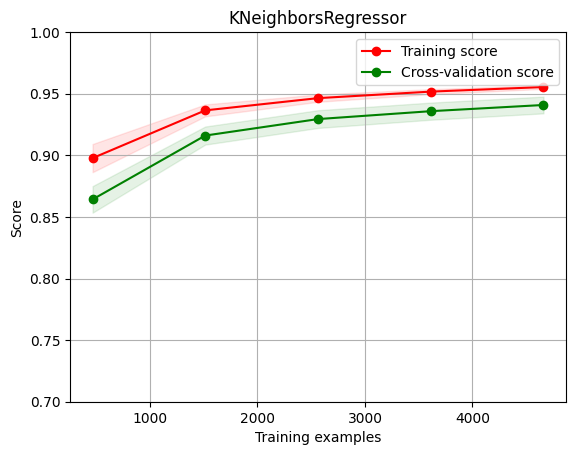

In [111]:
X = train_data.values
y = train_target.values

# K近邻回归
title = r"KNeighborsRegressor"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = KNeighborsRegressor(n_neighbors=8)    #建模
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.0), cv=cv, n_jobs=1)

In [112]:
clf = DecisionTreeRegressor()
clf.fit(train_data, train_target)

score = mean_squared_error(test_target, clf.predict(test_data))
print("DecisionTreeRegressor:   ", score)

DecisionTreeRegressor:    0.004118050789293068


[1. 1. 1. 1. 1.]
[0.88733948 0.95902201 0.97114667 0.97921874 0.98457495]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

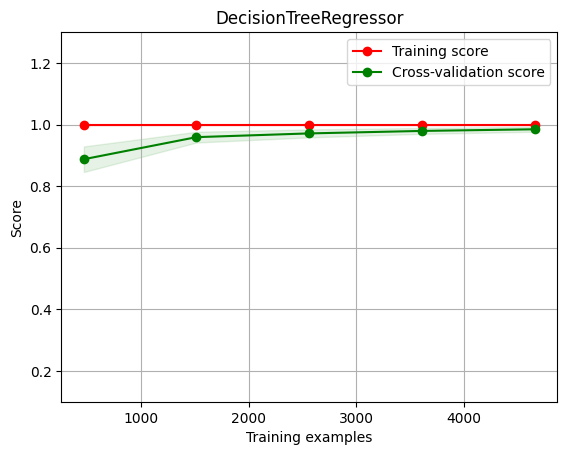

In [113]:
X = train_data.values
y = train_target.values

# 决策树回归
title = r"DecisionTreeRegressor"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = DecisionTreeRegressor()    #建模
plot_learning_curve(estimator, title, X, y, ylim=(0.1, 1.3), cv=cv, n_jobs=1)

In [114]:
clf = RandomForestRegressor(n_estimators=200) # 200棵树模型
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("RandomForestRegressor:   ", score)

RandomForestRegressor:    0.003768239533287577


[0.99063582 0.9963372  0.99760977 0.9981771  0.99851318]
[0.92939709 0.97296328 0.98244208 0.98637139 0.98926194]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

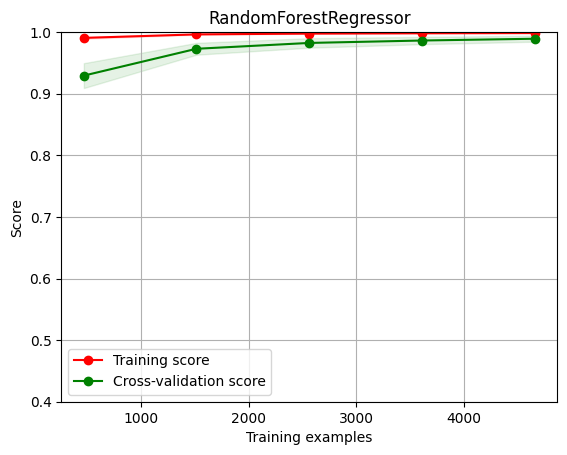

In [115]:
X = train_data.values
y = train_target.values

# K近邻回归
title = r"RandomForestRegressor"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestRegressor(n_estimators=200)    #建模
plot_learning_curve(estimator, title, X, y, ylim=(0.4, 1.0), cv=cv, n_jobs=1)